In [2]:
package vehicle_model {
    package general_definition {}
    package port_definition {}
    package interface_definition {}
    package usage_p1 {}
    package usage_p4 {}
}

Package vehicle_model (cc37f008-9feb-48cc-9be1-864df4812cfa)


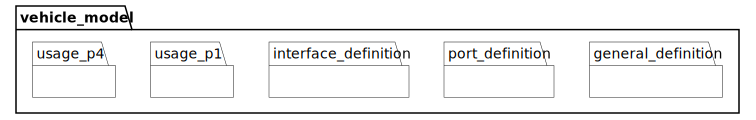

In [3]:
%viz vehicle_model 

In [4]:
package general_definition{
    part def vehicle {
        attribute mass;
        attribute class;
        }
    part def ice{
        attribute max_power;
        attribute max_torque;
    }
    part def motor{
        attribute max_power;
        attribute max_torque;
        }
    
    part def battery{
        attribute capacity;
        attribute max_voltage;
        }
    part def control_unit;
    
    item def mech_power;
    item def elec_power;
    item def control_signals;

}



Package general_definition (b52cee1a-a436-48fa-8e28-3f22059eec27)


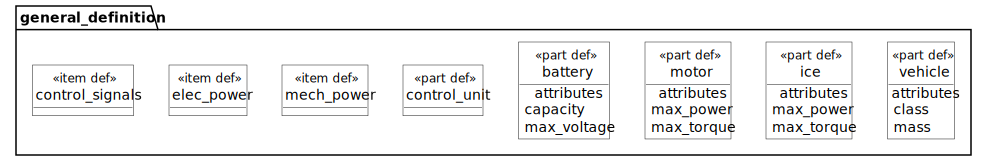

In [5]:
%viz --view=DEFAULT  general_definition

In [6]:
package port_definition{
    private import general_definition::*;
    
    //mech ports
    port def mech_trq{
        out item trq:mech_power;
    }
    port def mech_spe{
        out item spe:mech_power;
    }
    
    //elec ports
    port def elec_vol{
        out item vol:elec_power;
    }
    port def elec_cur{
        out item cur:elec_power;
    }
    
    //data ports
    port def ctrl_load{
        out item ld_sgn:control_signals;
    }

    
    //monitoring port
    port def mon_vel{
        out item vel_sgn:control_signals;
    }
    port def mon_soc{
        out item soc:control_signals;
    }
}



Package port_definition (e518a54e-f97a-4f03-ba2d-ac877f3af3d6)


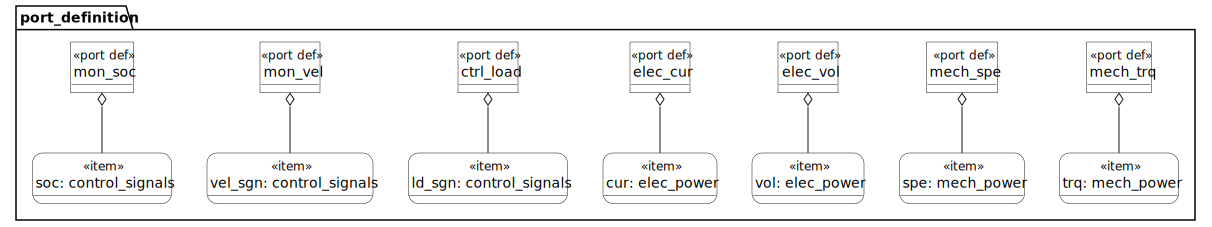

In [7]:
%viz --style=SHOWINHERITED port_definition

In [8]:
package interface_definition{
    private import general_definition::*;
    private import port_definition::*;  
    
    interface def trq_int{
        end output:mech_trq;
        end input:~mech_trq;
    flow of trq:mech_power from output.trq to input.trq;
    }
    interface def spe_int{
        end output:mech_spe;
        end input:~mech_spe;
    flow of spe:mech_power from output.spe to input.spe;
    }
    interface def vol_int{
        end output:elec_vol;
        end input:~elec_vol;
    flow of vol:elec_power from output.vol to input.vol;
    }
    interface def cur_int{
        end output:elec_cur;
        end input:~elec_cur;
    flow of cur:elec_power from output.cur to input.cur;
    }
    
    
    //data interfaces
    
    interface def ld_sgn_int{
        end output:ctrl_load;
        end input:~ctrl_load;
    flow of ld_sgn:control_signals from output.ld_sgn to input.ld_sgn;
    }
    
    interface def mon_vel_int{
        end output:mon_vel;
        end input:~mon_vel;
    flow of vel_sgn:control_signals from output.vel_sgn to input.vel_sgn;
    }
    
    interface def mon_soc_int{
        end output:mon_soc;
        end input:~mon_soc;
    flow of soc:control_signals from output.soc to input.soc;
    }
    
}



Package interface_definition (d3d55f77-ba7f-4896-9999-ac26bad0ab0f)


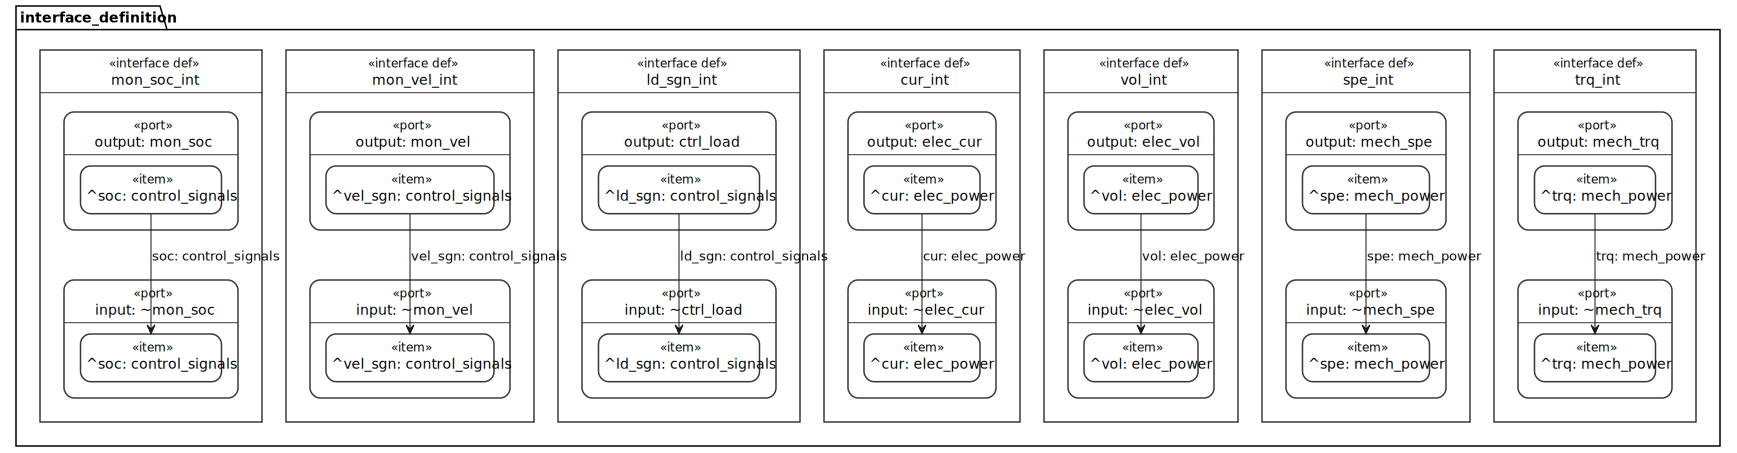

In [9]:
%viz --view=INTERCONNECTION interface_definition

In [14]:
package usage_p1 {
    private import general_definition::*;
    private import port_definition::*;
    private import interface_definition::*;  
    
    part vehicle_p1:vehicle{
        attribute mass = 1500;
        attribute A_class; 
        port driveline_trq_in:~mech_trq;
        port driveline_speed_out:mech_spe;
        port velocity_out:mon_vel;
        
        port load_out:ctrl_load;
    }
    
    part engine_p1:ice{
        attribute max_power=100;
        attribute max_torque=200;
        
        //mech connections
        port engine_trq_out:mech_trq;
        port engine_speed_in:~mech_spe;
        
        port em_trq_in:~mech_trq;
        port em_spe_out:mech_spe;
        //control connections
        port eng_ld_sgn_in:~ctrl_load;        
    }
    
    part em:motor{
        attribute max_power=15;
        attribute max_torque=50;
        
        //mech connections
        port mtr_trq_out:mech_trq;
        port mtr_speed_in:~mech_spe;
        
        //elec connectioncs
        port vol_in:~elec_vol;
        port cur_out:elec_cur;
        
        //control connections
        port mtr_ld_sgn_in:~ctrl_load;        
    }
    
    part bat:battery{
        attribute capacity=5;
        attribute max_voltage=48;
        
        //elec connection
        port vol_out:elec_vol;
        port cur_in:~elec_cur;
        
        //control connections
        port soc_out:mon_soc;
    }
    
    part ctrl:control_unit{
        
        attribute soc_limit=0.2; // how to make it equal as the battery limit?!
        
        //out ports
        port en_ld_sgn_out:ctrl_load;
        port mtr_ld_sgn_out:ctrl_load;
        
        //in ports
        port vehicle_vel:~mon_vel;
        port soc_in:~mon_soc;
        port load_in:~ctrl_load;
    }
    
    //vechile connections
    interface int1:trq_int connect engine_p1.engine_trq_out to vehicle_p1.driveline_trq_in;
    interface int2:spe_int connect vehicle_p1.driveline_speed_out to engine_p1.engine_speed_in;
    interface int3:mon_vel_int connect vehicle_p1.velocity_out to ctrl.vehicle_vel;
    interface int4:ld_sgn_int connect vehicle_p1.load_out to ctrl.load_in;
    
    //engine connections
    interface int5:trq_int connect em.mtr_trq_out to engine_p1.em_trq_in;
    interface int6:spe_int connect engine_p1.em_spe_out to em.mtr_speed_in;
    interface int7:ld_sgn_int connect ctrl.en_ld_sgn_out to engine_p1.eng_ld_sgn_in;
    
    //motor connections
    interface int8:vol_int connect bat.vol_out to em.vol_in;
    interface int9:cur_int connect em.cur_out to bat.cur_in;
    interface int10:ld_sgn_int connect ctrl.mtr_ld_sgn_out to em.mtr_ld_sgn_in;
    
    // control connections
    interface int11:mon_soc_int connect bat.soc_out to ctrl.soc_in;

}

Package usage_p1 (7efed44f-5d97-419f-84be-ed2a1ba6b8f8)


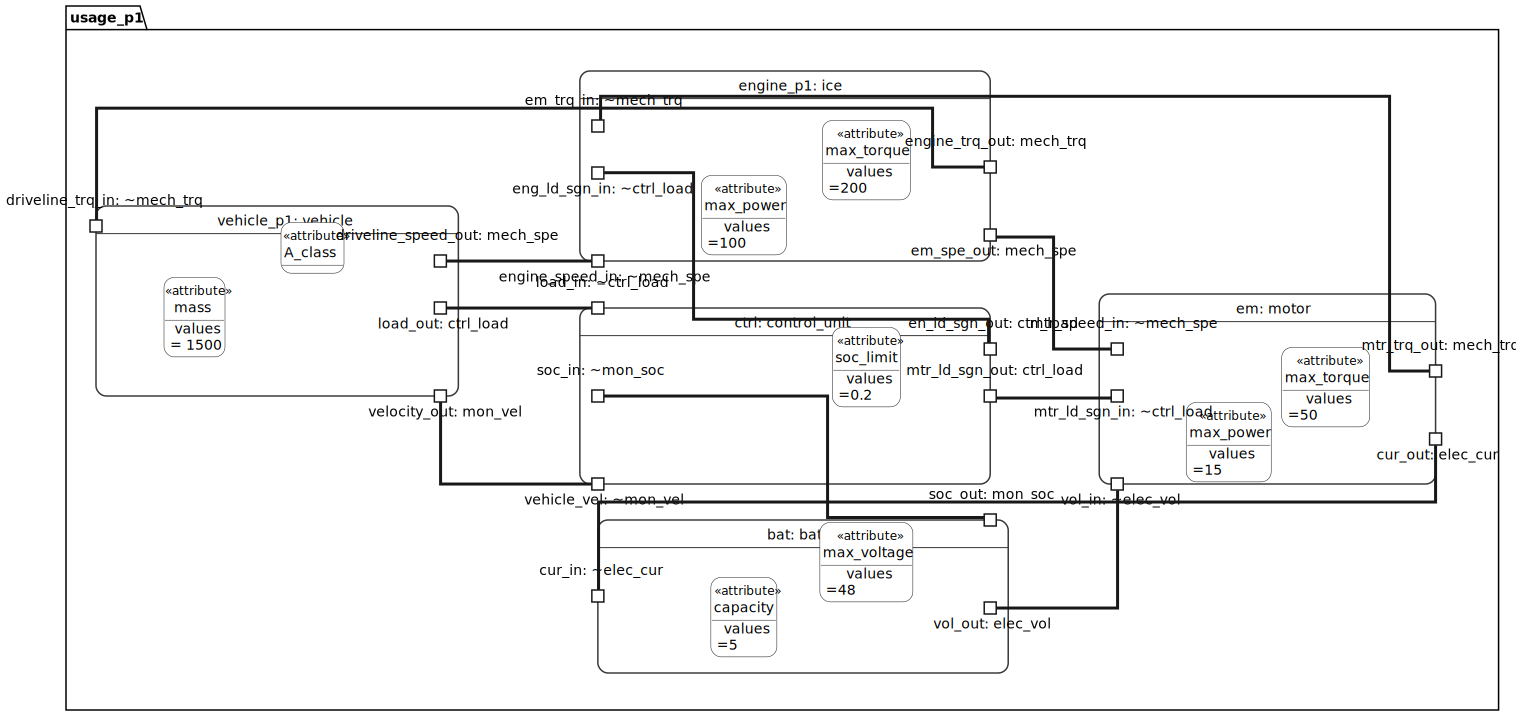

In [15]:
%viz --view=INTERCONNECTION --style=LR --style=ORTHOLINE usage_p1

In [17]:
package usage_p4 {
    private import general_definition::*;
    private import port_definition::*;
    private import interface_definition::*;  
    
    part vehicle_p4:vehicle{
        attribute mass = 1500;
        attribute A_class; 
        port driveline_trq_in_1:~mech_trq;
        port driveline_speed_out_1:mech_spe;
        
        port driveline_trq_in_2:~mech_trq;
        port driveline_speed_out_2:mech_spe;
        
        port velocity_out:mon_vel;
        
        port load_out:ctrl_load;
    }
    
    part engine_p4:ice{
        attribute max_power=100;
        attribute max_torque=200;
        //mech connections
        port engine_trq_out:mech_trq;
        port engine_speed_in:~mech_spe;
        
        //control connections
        port eng_ld_sgn_in:~ctrl_load;        
    }
    
    part em:motor{
        attribute max_power=30;
        attribute max_torque=100;
        //mech connections
        port mtr_trq_out:~mech_trq;
        port mtr_speed_in:mech_spe;
        
        //elec connectioncs
        port vol_in:~elec_vol;
        port cur_out:elec_cur;
        
        //control connections
        port mtr_ld_sgn_in:~ctrl_load;        
    }
    
    part bat:battery{
        attribute capacity=10;
        attribute max_voltage=400;
       
        
        //elec connection
        port vol_out:elec_vol;
        port cur_in:~elec_cur;
        
        //control connections
        port soc_out:mon_soc;
    }
    
    part ctrl:control_unit{
        
           
        //out ports
        port en_ld_sgn_out:ctrl_load;
        port mtr_ld_sgn_out:ctrl_load;
        
        //in ports
        port vehicle_vel:~mon_vel;
        port soc_in:~mon_soc;
        port load_in:~ctrl_load;
    }
    
    //vechile connections
    interface int1:trq_int connect engine_p4.engine_trq_out to vehicle_p4.driveline_trq_in_1;
    interface int2:spe_int connect vehicle_p4.driveline_speed_out_1 to engine_p4.engine_speed_in;
    interface int3:mon_vel_int connect vehicle_p4.velocity_out to ctrl.vehicle_vel;
    interface int4:ld_sgn_int connect vehicle_p4.load_out to ctrl.load_in;
    interface int5:trq_int connect em.mtr_trq_out to vehicle_p4.driveline_trq_in_2;
    interface int6:spe_int connect vehicle_p4.driveline_speed_out_2 to em.mtr_speed_in;
    
    //engine connections
    interface int7:ld_sgn_int connect ctrl.en_ld_sgn_out to engine_p4.eng_ld_sgn_in;
    
    //motor connections
    interface int8:vol_int connect bat.vol_out to em.vol_in;
    interface int9:cur_int connect em.cur_out to bat.cur_in;
    interface int10:ld_sgn_int connect ctrl.mtr_ld_sgn_out to em.mtr_ld_sgn_in;
    
    // control connections
    interface int11c:mon_soc_int connect bat.soc_out to ctrl.soc_in;

}

Package usage_p4 (a39184bc-9ad2-438a-80f6-b7dc56f5c9c7)


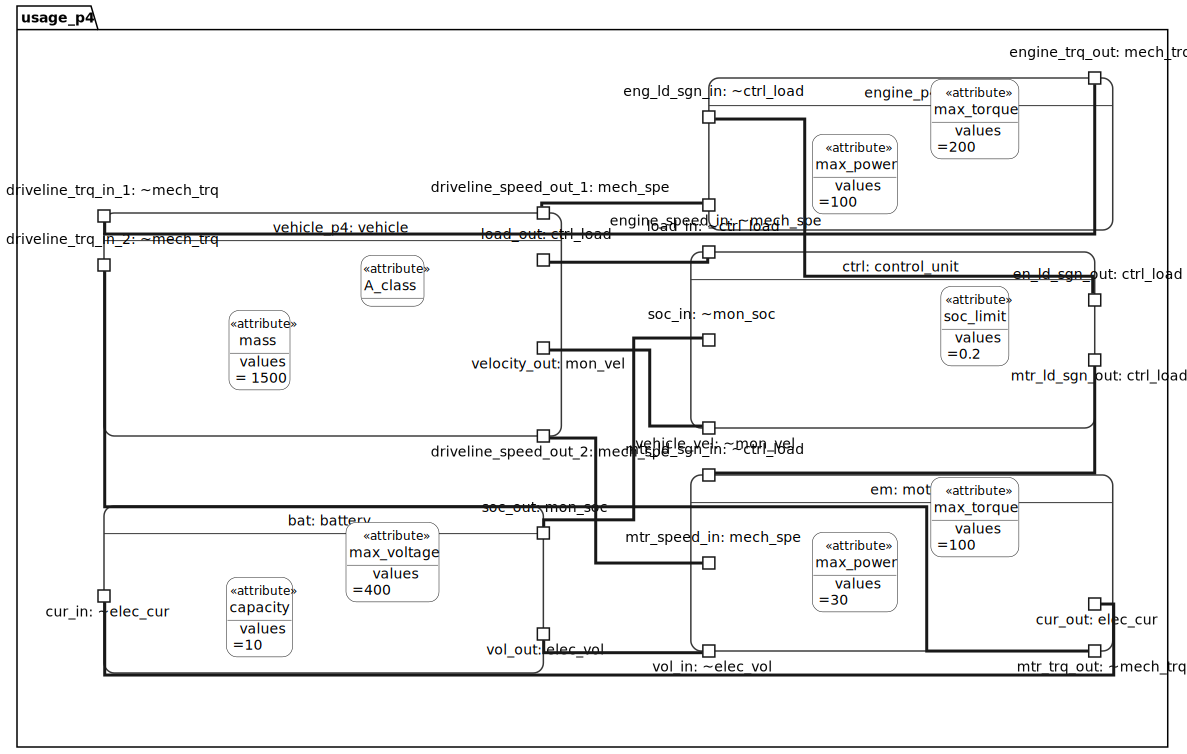

In [18]:
%viz --view=INTERCONNECTION --style=LR --style=ORTHOLINE usage_p4